In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.datasets import make_circles, make_moons, make_blobs
from numpy import random
from sklearn import mixture

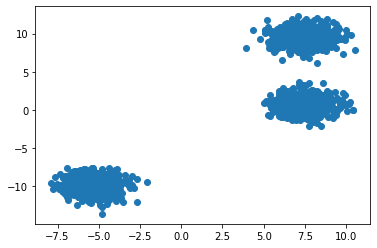

In [104]:
n_samples = 1500
centers = 3
dataset = make_blobs(n_samples=n_samples, random_state=8, centers=centers)
dataset=pd.DataFrame(dataset[0],columns = ["x", "y"])
dataset.head()
plt.scatter(dataset['x'], dataset['y'])

In [105]:
def initialize(data, k):
    means = random.randint(10, size = (k,data.shape[1]))
    weights = np.ones(k) / k
    covs = np.array([np.cov(data.T)]*k)
    return means, covs, weights
means, covs, weights = initialize(dataset, 3)
print(means, covs, weights)

[[3 5]
 [9 3]
 [7 7]] [[[37.22482025 42.30014714]
  [42.30014714 62.890394  ]]

 [[37.22482025 42.30014714]
  [42.30014714 62.890394  ]]

 [[37.22482025 42.30014714]
  [42.30014714 62.890394  ]]] [0.33333333 0.33333333 0.33333333]


In [106]:
multivariate_gaussian_pdf = multivariate_normal.pdf
def E_step(data, means, covs, weights):
    n_data = data.shape[0]
    n_clusters = means.shape[0]
    responsibilities = np.zeros([n_data, n_clusters])
    for c in range(n_clusters):
        responsibilities[:,c] = multivariate_gaussian_pdf(data, means[c], covs[c])
    responsibilities = weights*responsibilities
    responsibilities /= responsibilities.sum(axis=1)[:,np.newaxis]
    return responsibilities
responsibilities =E_step(dataset, means, covs, weights)
print(responsibilities)

[[0.5078223  0.0378733  0.45430441]
 [0.61197594 0.01298529 0.37503877]
 [0.50671992 0.03048394 0.46279615]
 ...
 [0.48248349 0.03554016 0.48197635]
 [0.44174643 0.20474508 0.35350849]
 [0.33332852 0.31549689 0.35117459]]


In [107]:
def M_step(data, responsibilities, means, covs):
    n_data, n_clusters = responsibilities.shape
    weights = responsibilities.sum(axis=0)
    for c in range(n_clusters):
        resp = responsibilities[:,c].reshape(n_data,1)
        means[c] = (resp*data).sum(axis=0) / resp.sum()
        covs[c] = ((data - means[c]).T).dot((data - means[c])*resp) / weights[c]
    weights /= weights.sum()
    return means, covs, weights
print(M_step(dataset, responsibilities, means, covs))

(array([[0, 0],
       [5, 0],
       [3, 1]]), array([[[41.96950543, 58.3504746 ],
        [58.3504746 , 89.13144252]],

       [[22.93580996, 20.38386086],
        [20.38386086, 25.12700353]],

       [[36.34179736, 47.7047907 ],
        [47.7047907 , 73.28526177]]]), array([0.32582687, 0.33955315, 0.33461998]))


In [110]:
def Gaussian_Mixture(data, n_clusters, n_iterations=1000):
    means, covs, weights = initialize(data, n_clusters)
    assignments = []
    for i in range(n_iterations):
        responsibilities = E_step(data, means, covs, weights)
        assignments = responsibilities.argmax(axis=1)
        means, covs, weights = M_step(data, responsibilities, means, covs)
        
    assignments = np.array(assignments)
    return means, covs, assignments
print(Gaussian_Mixture(dataset, 3, n_iterations=1000))

(array([[-5, -9],
       [ 7,  9],
       [ 7,  0]]), array([[[1.00831965, 0.22829281],
        [0.22829281, 1.64352293]],

       [[1.34052333, 0.24866238],
        [0.24866238, 1.16053675]],

       [[1.13942189, 0.31020531],
        [0.31020531, 1.43151141]]]), array([1, 1, 1, ..., 1, 0, 0], dtype=int64))


In [111]:
GMM = mixture.GaussianMixture(n_components=3, covariance_type='full')
GMM.fit(dataset)
print(GMM.predict(dataset))

[1 1 1 ... 1 0 0]
